# Multilabel classification

We develop here a model for multilabel classification.

In [1]:
from pathlib import Path
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

from NegativeClassOptimization import datasets
from NegativeClassOptimization import preprocessing
from NegativeClassOptimization import ml

/home/eugen/miniconda3/envs/nco/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = ml.MultilabelSNN(hidden_dim = 10, num_classes = 3)
X = torch.rand((10, 220))
model.forward(X)

tensor([[0.5637, 0.5019, 0.5087],
        [0.5362, 0.4837, 0.4863],
        [0.5496, 0.4792, 0.5139],
        [0.5316, 0.4892, 0.4802],
        [0.5325, 0.4716, 0.5074],
        [0.5135, 0.5215, 0.4979],
        [0.5403, 0.4799, 0.4663],
        [0.4963, 0.5200, 0.4797],
        [0.5295, 0.5127, 0.4894],
        [0.5247, 0.5013, 0.4774]], grad_fn=<SigmoidBackward0>)

In [3]:
y = torch.tensor(np.random.choice([0, 1], (10, 3)))
y

tensor([[0, 1, 0],
        [0, 0, 0],
        [0, 1, 1],
        [0, 1, 1],
        [1, 1, 1],
        [1, 1, 0],
        [0, 0, 0],
        [1, 0, 1],
        [0, 0, 0],
        [0, 1, 1]])

In [4]:
loss = nn.BCELoss()

ml.compute_loss(
    model, 
    loss, 
    X,
    y,
)

tensor(0.7115, grad_fn=<BinaryCrossEntropyBackward0>)

In [5]:
model.linear_1(model.flatten(X))

tensor([[ 0.4074,  0.0264,  0.0277,  0.5014, -0.3050, -0.1861, -0.1766,  0.0155,
          0.0944,  0.5483],
        [ 0.5968,  0.0681,  0.0714,  0.3203, -0.0339, -0.4058, -0.2426, -0.2135,
          0.4137,  0.4051],
        [ 0.6784, -0.1314, -0.4113,  0.1817,  0.0134, -0.5513, -0.1062, -0.0610,
          0.0775,  0.4496],
        [ 0.3290,  0.0746,  0.0674,  0.2757, -0.2442, -0.1877,  0.1303, -0.5303,
          0.3996,  0.5777],
        [ 0.4832, -0.1626, -0.0317,  0.2795,  0.2737,  0.0655,  0.1392, -0.1180,
          0.2094,  0.5079],
        [ 0.3733,  0.2959, -0.1039,  0.0834, -0.1084, -0.3195, -0.0744, -0.2028,
         -0.0284,  0.3866],
        [ 0.5267,  0.0424,  0.2016,  0.5036, -0.0113, -0.1709, -0.1463, -0.3491,
          0.6908,  0.5341],
        [ 0.3622,  0.2215,  0.0062,  0.5495,  0.2918, -0.0565, -0.0086,  0.1775,
          0.4266,  0.0372],
        [ 0.4085,  0.0961, -0.1846,  0.3790, -0.1064, -0.2778,  0.0076,  0.1486,
          0.2027,  0.2463],
        [ 0.3140,  

In [6]:
X_o = torch.rand((10, 220))

metrics_open = ml.compute_metrics_open_testset(model, X, X_o)
# metrics_closed = ml.compute_metrics_closed_testset(model, X, y)
model.compute_metrics_closed_testset(X, y)


{'multilabel_fraction': 0.1,
 'precision_weighted_closed': 0.5428571428571428,
 'precision_None_closed': array([0.22222222, 0.6       , 0.66666667]),
 'precision_macro_closed': 0.4962962962962963,
 'precision_micro_closed': 0.4117647058823529,
 'recall_weighted_closed': 0.5,
 'recall_None_closed': array([0.66666667, 0.5       , 0.4       ]),
 'recall_macro_closed': 0.5222222222222221,
 'recall_micro_closed': 0.5,
 'f1_weighted_closed': 0.48376623376623373,
 'f1_None_closed': array([0.33333333, 0.54545455, 0.5       ]),
 'f1_macro_closed': 0.45959595959595956,
 'f1_micro_closed': 0.45161290322580644}

In [7]:
df_train_val = pd.read_csv("../data/Absolut/processed/multilabel/df_train_val.tsv", sep='\t')
df_train_val_2 = pd.read_csv("../data/Absolut/processed/multiclass/df_train_val.tsv", sep='\t')

print(df_train_val.shape)
df_train_val.head()

(903717, 5)


,Unnamed: 0,index,Slide,Antigen,Slide_farmhash_mod_10
0,1,83,AAFYYGNLAWF,1ADQ_A,2
1,2,157,AAIFITTGGFD,1ADQ_A,6
2,3,163,AAIIYYDYGFD,1ADQ_A,2
3,4,165,AAILLPEYYFD,1ADQ_A,6
4,5,193,AAIWLRRWYFD,1ADQ_A,1


In [8]:
df_train_val["Slide"].duplicated(keep=False).sum()

539523

<AxesSubplot:title={'center':'Sorted #duplications per slide'}>

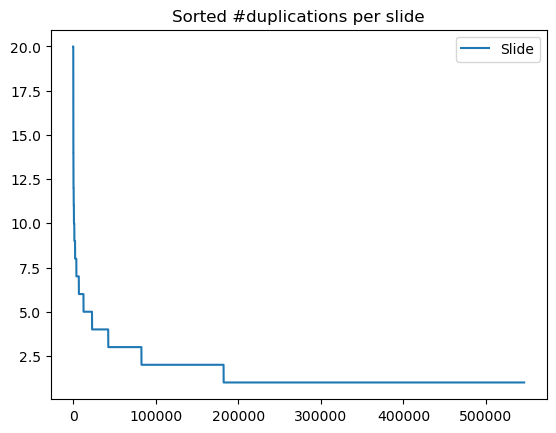

In [9]:
df_train_val["Slide"].value_counts().reset_index().plot(title="Sorted #duplications per slide")

Process dataframe to multilabel format.

In [10]:
df_train_val.head(2)

,Unnamed: 0,index,Slide,Antigen,Slide_farmhash_mod_10
0,1,83,AAFYYGNLAWF,1ADQ_A,2
1,2,157,AAIFITTGGFD,1ADQ_A,6


In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb_encoder = MultiLabelBinarizer()
# mlb.fit_transform([(1, 2), (3,), (2, 1)])
# multilabel_bin = mlb_encoder.fit_transform(df_train_val.groupby("Slide")["Antigen"].agg(lambda x: tuple(x)))
# (multilabel_bin.sum(axis=1) > 1).sum() / multilabel_bin.shape[0]

In [12]:
df, scaler, encoder = preprocessing.preprocess_df_for_multilabel(
    df_train_val,
    ags=["1YJD_C", "4K24_A", "5T5F_A",],
    sample=1000,
)

Resetting the index of df_train_val.


In [13]:
df

,index,Slide,Antigen,Slide_farmhash_mod_10,Slide_onehot,X,y
0,0,AAFITTVVRYF,[1YJD_C],1,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.047730269202701, -0.4738563888992363, -0.11...","[1, 0, 0]"
1,1,AALLYDGYYPF,[4K24_A],7,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.047730269202701, -0.4738563888992363, -0.11...","[0, 1, 0]"
2,2,AEFITTVAYYF,[1YJD_C],6,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.047730269202701, -0.4738563888992363, -0.11...","[1, 0, 0]"
3,3,AGGLLDYPAWF,[1YJD_C],6,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.047730269202701, -0.4738563888992363, -0.11...","[1, 0, 0]"
4,4,AGLITTVVGYF,[1YJD_C],6,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3.047730269202701, -0.4738563888992363, -0.11...","[1, 0, 0]"
...,...,...,...,...,...,...,...
993,993,YYGYFAWFAYW,[5T5F_A],1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.3281130256522331, -0.4738563888992363, -0....","[0, 0, 1]"
994,994,YYGYVLYAMDY,[4K24_A],1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.3281130256522331, -0.4738563888992363, -0....","[0, 1, 0]"
995,995,YYSNFLWYCDV,[4K24_A],1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.3281130256522331, -0.4738563888992363, -0....","[0, 1, 0]"
996,996,YYSNVWWYFDV,[4K24_A],4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.3281130256522331, -0.4738563888992363, -0....","[0, 1, 0]"


In [14]:
ds = datasets.MultilabelDataset(df)
ds[3]

(tensor([[ 3.0477, -0.4739, -0.1103, -0.1430, -0.1820, -0.2297, -0.1193, -0.2551,
          -0.1235, -0.3110, -0.1149, -0.0954, -0.1466, -0.0840, -0.5147, -0.2173,
          -0.1570, -0.2223, -0.1536, -0.1699, -0.4402, -0.0954, -0.1466, -0.1603,
          -0.2173,  3.1381, -0.1103, -0.2704, -0.0840, -0.4499, -0.0899, -0.1006,
          -0.1878, -0.1056, -0.2871, -0.1934, -0.2368, -0.2272, -0.2017, -0.2809,
          -0.1668, -0.0448, -0.1962, -0.1276, -0.1878,  2.7178, -0.0634, -0.2551,
          -0.1316, -0.4849, -0.0899, -0.1316, -0.1730, -0.1235, -0.4402, -0.2507,
          -0.2484, -0.1235, -0.1820, -0.3262, -0.1235, -0.0448, -0.2043, -0.1316,
          -0.2043, -0.2932, -0.1103, -0.2851, -0.1056,  1.6296, -0.0710, -0.1570,
          -0.1668, -0.1193, -0.2096, -0.2122, -0.2173, -0.2198, -0.2122, -0.4123,
          -0.1193, -0.0448, -0.2017, -0.1149, -0.2596, -0.3032, -0.0710, -0.2096,
          -0.0448,  1.4390, -0.0549, -0.0840, -0.1636, -0.1006, -0.2272, -0.1878,
          -0.287

In [15]:
ml.compute_loss(model, nn.BCELoss(), ds[3][0], ds[3][1])

tensor(0.6956, grad_fn=<BinaryCrossEntropyBackward0>)